In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from lmfit import minimize, Parameters, report_fit

In [79]:
'''Read data'''
polarization_data = pd.read_csv(r'D:\LightFieldData\20230424_polarization_mapping_test\20230424_polarization_mapping_test_polarizationPlot_stp3.txt', delimiter=r"\s+|\t+",header=0)

angle_data = polarization_data['Spectrum']
amplitude_data = polarization_data['Amplitude']
x = []
y = []
for items in angle_data:
    x.append(items)
for items in amplitude_data:
    y.append(items)

x_data =np.array(x)*6/360*2*np.pi
y_data =np.array(y)
n = len(x_data)


C:\Users\qinyu\AppData\Local\Temp\ipykernel_1176\1593342784.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  polarization_data = pd.read_csv(r'D:\LightFieldData\20230424_polarization_mapping_test\20230424_polarization_mapping_test_polarizationPlot_stp3.txt', delimiter=r"\s+|\t+",header=0)


In [80]:
def g(x,a):
    g = a[0]*np.sin(a[1]*x+a[2])+a[3]
    return g

In [81]:
def residual(params, x, data):
    v = params.valuesdict()
    a = [v['a1'], v['a2'], v['a3'], v['a4']]
    model = g(x,a)
    return (data-model)

params = Parameters()
params.add('a1', value=22000,min=10000,max=30000)
params.add('a2', value=np.pi,min=0.75*np.pi, max= 1.25*np.pi)
params.add('a3', value=5*np.pi/6, min=np.pi/2, max=np.pi)
params.add('a4', value=25000, min=20000, max=30000)

out = minimize(residual, params, args=(x_data, y_data))
report_fit(out)
fitted_params = []
for name, param in out.params.items():
    fitted_params.append(param.value)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 153
    # data points      = 61
    # variables        = 4
    chi-square         = 1.9332e+10
    reduced chi-square = 3.3916e+08
    Akaike info crit   = 1202.02415
    Bayesian info crit = 1210.46765
[[Variables]]
    a1:  10000.0000 +/- 3316.90672 (33.17%) (init = 22000)
    a2:  3.18669854 +/- 0.18840469 (5.91%) (init = 3.141593)
    a3:  1.57079633 +/- 0.68282261 (43.47%) (init = 2.617994)
    a4:  24901.4493 +/- 2390.98450 (9.60%) (init = 25000)
[[Correlations]] (unreported correlations are < 0.100)
    C(a2, a3) = -0.869
    C(a3, a4) = 0.144
    C(a2, a4) = -0.138


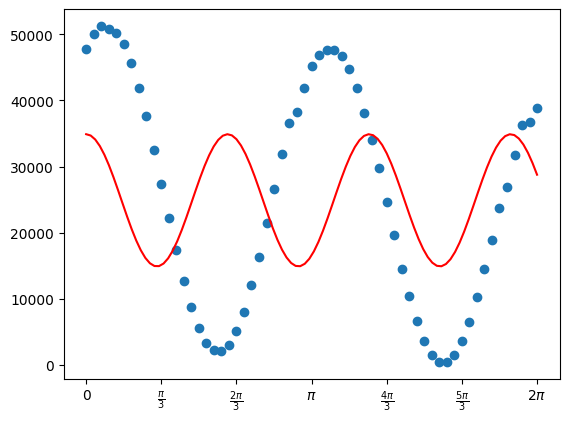

In [82]:
fig, ax = plt.subplots()
ax.scatter(x_data,y_data)
x = np.linspace(0,2*np.pi,100)
y = g(x,fitted_params)
ax.plot(x,y,'r')
x_in_radians = np.arange(0, 7, 1) * (np.pi / 3)
x_tick_labels = ['0', r'$\frac{\pi}{3}$', r'$\frac{2\pi}{3}$', r'$\pi$', r'$\frac{4\pi}{3}$', r'$\frac{5\pi}{3}$', r'$2\pi$']
ax.set_xticks(x_in_radians)
ax.set_xticklabels(x_tick_labels)


plt.show()
